In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

agg1 = pd.read_csv('E:\\study\\demo\\Data_Demo\\Python\\resource\\datasets\\agg_match_stats_4.csv')
agg1.head()

d:\envir\python\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,2,3,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-10-31T02:41:53+0000,95.0,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1.0,0.0,0.0,0.000000,37.919838,20.0,0.0,m3xdave,106.351,100000.0,88.0
1,2017-10-31T02:41:53+0000,95.0,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1.0,0.0,0.0,292.205048,3457.036130,387.0,3.0,UDaddyHere,1690.021,100006.0,8.0
2,2017-10-31T02:41:53+0000,95.0,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1.0,0.0,0.0,0.000000,106.215900,0.0,0.0,Dummy05,103.415,100010.0,89.0
3,2017-10-31T02:41:53+0000,95.0,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1.0,0.0,0.0,0.000000,126.959831,91.0,0.0,NA-Wuyifan,272.838,100019.0,67.0
4,2017-10-31T02:41:53+0000,95.0,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1.0,0.0,0.0,0.000000,43.346710,0.0,0.0,kickinchicken,134.342,100024.0,81.0


end


Text(0.5, 1.0, '击杀人数与吃鸡概率的关系')

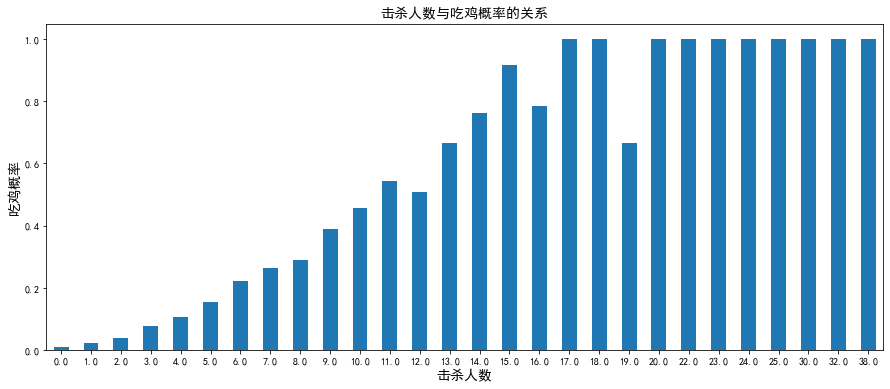

In [4]:
agg1.drop_duplicates(inplace=True)
agg1['won'] = agg1['team_placement'] == 1
agg1['drove'] = agg1['player_dist_ride'] != 0
agg1.loc[agg1['player_kills']<40,['player_kills','won']].groupby('player_kills').won.mean().plot.bar(figsize=(15,6),rot=0)
plt.xlabel('击杀人数',fontsize=14)
plt.ylabel('吃鸡概率',fontsize=14)
plt.title('击杀人数与吃鸡概率的关系',fontsize=14)



d:\envir\python\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\envir\python\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


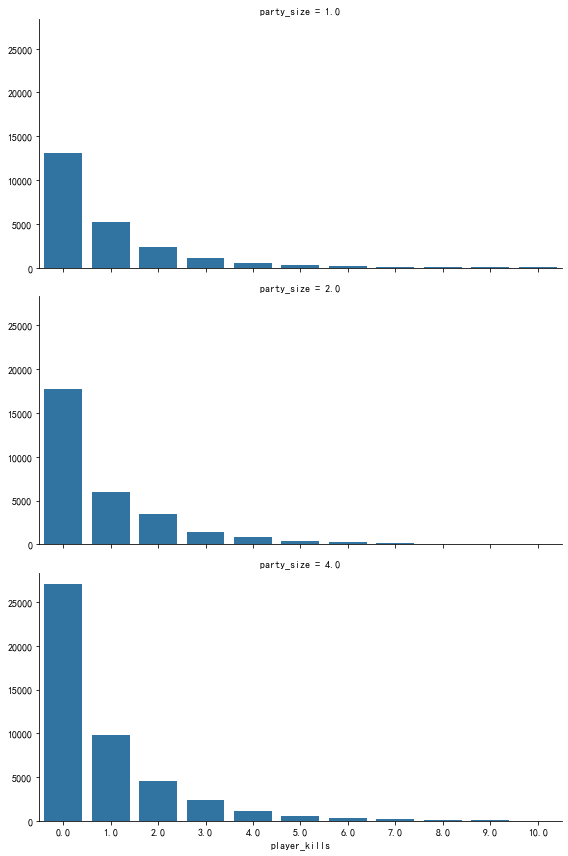

In [10]:
agg1.groupby('party_size').player_kills.mean()
g = sns.FacetGrid(agg1.loc[agg1['player_kills']<=10,['party_size','player_kills']],row='party_size',size=4,aspect=2)
g = g.map(sns.countplot,'player_kills')



Text(0.5, 1.0, '助攻次数与吃鸡概率的关系')

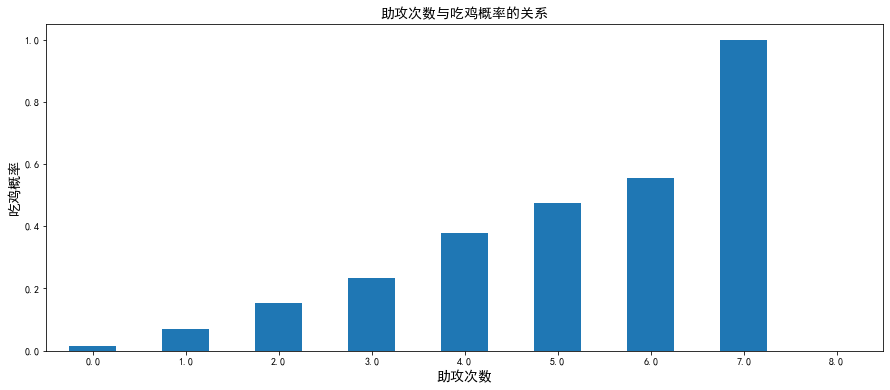

In [4]:
agg1.loc[agg1['party_size']!=1,['player_assists','won']].groupby('player_assists').won.mean().plot.bar(figsize=(15,6),rot=0)
plt.xlabel('助攻次数',fontsize=14)
plt.ylabel('吃鸡概率',fontsize=14)
plt.title('助攻次数与吃鸡概率的关系',fontsize=14)

([<matplotlib.axis.YTick at 0x12b46b10>,
 [Text(0, 1, '是'), Text(0, 0, '否')])

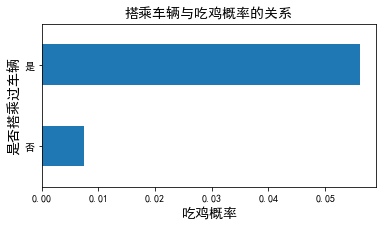

In [5]:
agg1.groupby('drove').won.mean().plot.barh(figsize=(6,3))
plt.xlabel('吃鸡概率',fontsize=14)
plt.ylabel('是否搭乘过车辆',fontsize=14)
plt.title('搭乘车辆与吃鸡概率的关系',fontsize=14)
plt.yticks([1,0],['是','否'])

In [6]:
match_unique = agg1.loc[agg1['party_size']==1,'match_id'].unique()
death1 = pd.read_csv('E:\\study\\demo\\Data_Demo\\Python\\resource\\datasets\\kill_match_stats_final_1.csv')
death1.head()

d:\envir\python\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,5,6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,SCAR-L,854545656,1.0,366716.6,302736.6,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,1059.0,SmileyRiley,32.0,366591.3,302851.8
1,AKM,chane_e,57.0,436041.6,276913.3,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,109.0,bonesaw53,85.0,434867.2,276258.3
2,Hit by Car,LY0629,42.0,265942.7,404094.2,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,624.0,Robi256,44.0,265409.5,403900.4
3,SKS,Supramida,6.0,339174.6,258929.0,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,1450.0,Senorbotches,14.0,331995.5,253868.1
4,M416,scopionzy,3.0,289848.4,290939.0,MIRAMAR,2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...,1296.0,lukesteeler,24.0,290196.1,291358.5


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'M416'),
  Text(0, 1, 'SCAR-L'),
  Text(0, 2, 'M16A4'),
  Text(0, 3, 'AKM'),
  Text(0, 4, 'UMP9'),
  Text(0, 5, 'S1897'),
  Text(0, 6, 'Mini 14'),
  Text(0, 7, 'Punch'),
  Text(0, 8, 'Kar98k'),
  Text(0, 9, 'S686')])

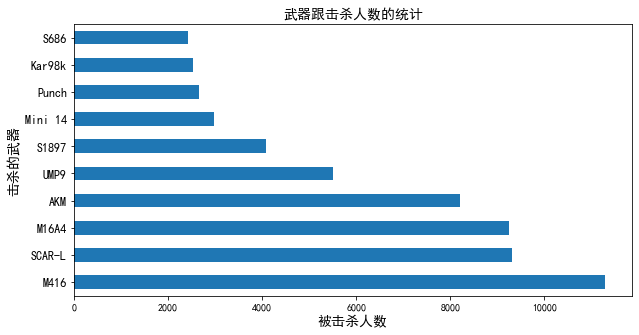

In [7]:
died_of = death1.loc[(death1['killer_position_x']>0)&(death1['killed_by']!='Down and Out'),:]
died_of['killed_by'].value_counts()[:10].plot.barh(figsize=(10,5))
plt.xlabel('被击杀人数',fontsize=14)
plt.ylabel('击杀的武器',fontsize=14)
plt.title('武器跟击杀人数的统计',fontsize=14)
plt.yticks(fontsize=12)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

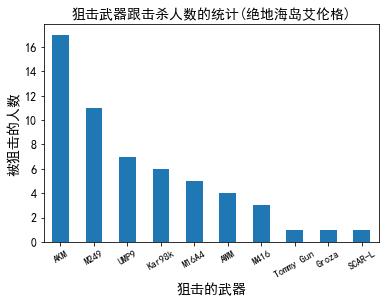

In [8]:
distance = np.sqrt(((died_of['killer_position_x']-died_of['victim_position_x'])/100)**2+((died_of['killer_position_y']-died_of['victim_position_y'])/100)**2)
died_of.loc[(distance>800)&(distance<1500),'killed_by'].value_counts()[:10].plot.bar(rot=30)
plt.xlabel("狙击的武器", fontsize=14)
plt.ylabel("被狙击的人数", fontsize=14)
plt.title('狙击武器跟击杀人数的统计(绝地海岛艾伦格)', fontsize=14)
plt.yticks(fontsize=12)

In [9]:
died_of['dist'] = distance
died_of = died_of.loc[died_of['dist']<800,:]
top_weapons = list(died_of['killed_by'].value_counts()[:10].index)
top_weapons_kills = died_of[np.in1d(died_of['killed_by'],top_weapons)].copy()
top_weapons_kills['bin'] = pd.cut(top_weapons_kills['dist'],np.arange(0,800,10),include_lowest=True,labels=False)
top_weapons_kills_wide = top_weapons_kills.groupby(['killed_by','bin']).size().unstack(fill_value=0).transpose()
top_weapons_kills_wide = top_weapons_kills_wide.div(top_weapons_kills_wide.sum(axis=1),axis=0)

d:\envir\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
